### Name: Nallamalli Sri Durga Sai Dheeraj
### Student ID: 23098026

In [1]:
# import required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # Use MinMaxScaler to scale the data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load Dataset
data = pd.read_csv('/Users/dheeraj/Downloads/Python Assignment/CC General.csv')

# Display first 10 of the dataset
print("Dataset Overview:")
display(data.head(10))

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Overview:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12



Missing Values:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


/var/folders/0r/803rftr5229g1m824qmbpggm0000gn/T/ipykernel_38206/1863860909.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)
/var/folders/0r/803rftr5229g1m824qmbpggm0000gn/T/ipykernel_38206/1863860909.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 


Missing Values After Imputation:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


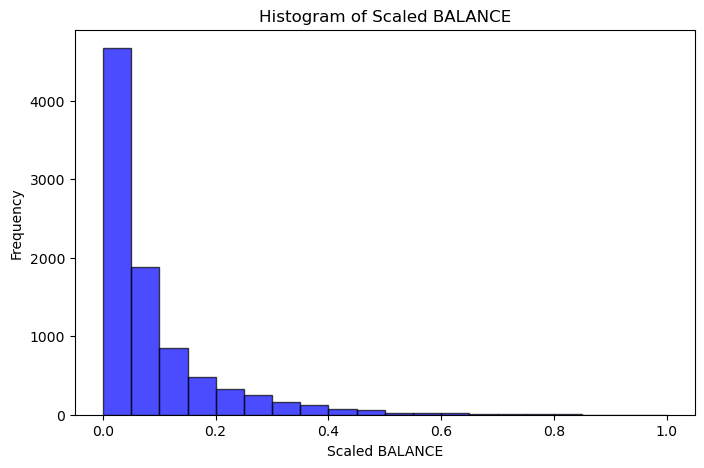

In [65]:
# Step 1: Handle Missing Values
# Impute missing values in 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT'

data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)

# Verify that missing values have been handled

print("\nMissing Values After Imputation:")
print(data.isnull().sum())

# Step 2: Drop Non-Numerical Columns
# 'CUST_ID' is non-numerical and won't be used in clustering

data_numeric = data.drop(columns=['CUST_ID'])

# Step 3: Feature Scaling using Min-Max Scaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Convert scaled data back to a DataFrame for easier handling

data_scaled_df = pd.DataFrame(data_scaled, columns=data_numeric.columns)

# Save the preprocessed dataset

preprocessed_data = '/Users/dheeraj/Downloads/Python Assignment/Preprocessed_CC_GENERAL_MinMax.csv'
data_scaled_df.to_csv(preprocessed_data, index=False)


def plot_scaled_balance_histogram(data_scaled_df, bins=20, color='blue', edgecolor='black', alpha=0.7, figsize=(8, 5)):
    """
    Plots a histogram of the 'BALANCE' feature from the given DataFrame after scaling.
    
    Parameters:
    - data_scaled_df: pandas DataFrame
        The DataFrame containing the scaled data, which should include the 'BALANCE' column.
    - bins: int, optional (default=20)
        The number of bins to use for the histogram.
    - color: str, optional (default='blue')
        The color of the bars in the histogram.
    - edgecolor: str, optional (default='black')
        The color of the edges of the histogram bars.
    - alpha: float, optional (default=0.7)
        The transparency level of the bars (0.0 is fully transparent, 1.0 is fully opaque).
    - figsize: tuple, optional (default=(8, 5))
        The size of the figure (width, height) in inches.
    
    Returns:
    - None
        This function does not return any value, it simply displays the histogram plot.
    """
    plt.figure(figsize=figsize)
    plt.hist(data_scaled_df['BALANCE'], bins=bins, color=color, edgecolor=edgecolor, alpha=alpha)
    plt.title('Histogram of Scaled BALANCE')
    plt.xlabel('Scaled BALANCE')
    plt.ylabel('Frequency')
    plt.show()
plot_scaled_balance_histogram(data_scaled_df)


In [67]:
print("\nFirst 5 Rows of Min-Max Scaled Data:")
display(data_scaled_df.head())


First 5 Rows of Min-Max Scaled Data:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


### Determine the Optimal Number of Clusters

#### Elbow Method:
    Compute the Within-Cluster Sum of Squares (WCSS) for a range of cluster counts (e.g., 1–10).
    Plot the WCSS and look for the "elbow point.
    


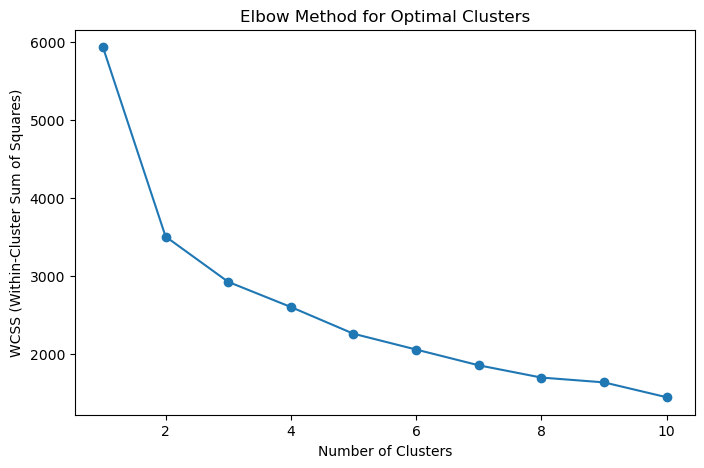

In [69]:
# Step 1: Elbow Method to Compute WCSS
wcss = []
range_n_clusters = range(1, 11)  # Cluster numbers from 1 to 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled_df)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow Method
def plot_elbow_method(range_n_clusters, wcss, figsize=(8, 5), marker='o', title="Elbow Method for Optimal Clusters",
                      xlabel="Number of Clusters", ylabel="WCSS (Within-Cluster Sum of Squares)"):
    """
    Plots the Elbow Method graph for determining the optimal number of clusters.

    Parameters:
    - range_n_clusters: list or array-like
        A sequence representing the range of cluster numbers used in the analysis.
    - wcss: list or array-like
        The Within-Cluster Sum of Squares (WCSS) values corresponding to the cluster range.
    - figsize: tuple, optional (default=(8, 5))
        The size of the figure (width, height) in inches.
    - marker: str, optional (default='o')
        The marker style for the points in the plot.
    - title: str, optional (default="Elbow Method for Optimal Clusters")
        The title of the plot.
    - xlabel: str, optional (default="Number of Clusters")
        The label for the x-axis.
    - ylabel: str, optional (default="WCSS (Within-Cluster Sum of Squares)")
        The label for the y-axis.

    Returns:
    - None
        This function does not return any value; it displays the plot.
    """
    plt.figure(figsize=figsize)
    plt.plot(range_n_clusters, wcss, marker=marker)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
plot_elbow_method(range_n_clusters, wcss)

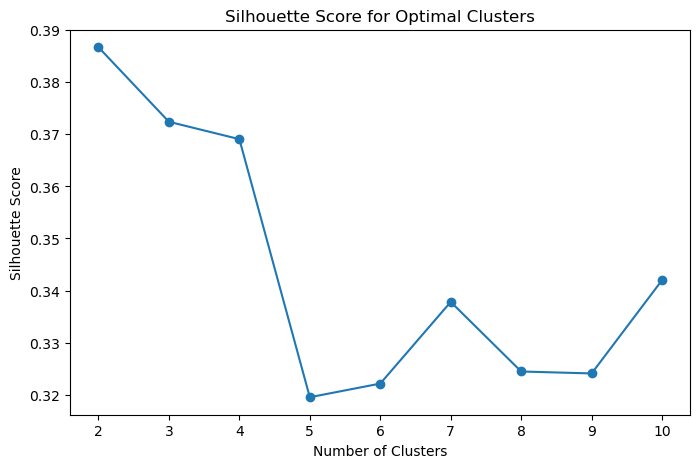

In [71]:
def calculate_and_plot_silhouette_scores(data, cluster_range=(2, 11), random_state=42, figsize=(8, 5), 
                                         marker='o', title="Silhouette Score for Optimal Clusters",
                                         xlabel="Number of Clusters", ylabel="Silhouette Score"):
    """
    Calculates silhouette scores for a range of cluster numbers and plots the scores to help determine the optimal number of clusters.

    Parameters:
    - data: pandas DataFrame or numpy array
        The dataset to be used for clustering.
    - cluster_range: tuple, optional (default=(2, 11))
        The range of cluster numbers to evaluate (inclusive).
    - random_state: int, optional (default=42)
        The random state for the KMeans algorithm to ensure reproducibility.
    - figsize: tuple, optional (default=(8, 5))
        The size of the figure (width, height) in inches.
    - marker: str, optional (default='o')
        The marker style for the points in the plot.
    - title: str, optional (default="Silhouette Score for Optimal Clusters")
        The title of the plot.
    - xlabel: str, optional (default="Number of Clusters")
        The label for the x-axis.
    - ylabel: str, optional (default="Silhouette Score")
        The label for the y-axis.

    Returns:
    - silhouette_scores: list
        The silhouette scores for each cluster number in the specified range.
    - None
        Displays the plot.
    """
    silhouette_scores = []

    for n_clusters in range(cluster_range[0], cluster_range[1]):  # Silhouette score requires at least 2 clusters
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot Silhouette Scores
    plt.figure(figsize=figsize)
    plt.plot(range(cluster_range[0], cluster_range[1]), silhouette_scores, marker=marker)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
    return silhouette_scores

silhouette_scores = calculate_and_plot_silhouette_scores(data_scaled_df)

In [72]:
# Print the Optimal Cluster Count Based on Silhouette Score

silhouette_optimal_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters based on Silhouette Score is: {silhouette_optimal_clusters}")

The optimal number of clusters based on Silhouette Score is: 2


### K-Mean Clustering

<Figure size 1000x600 with 0 Axes>

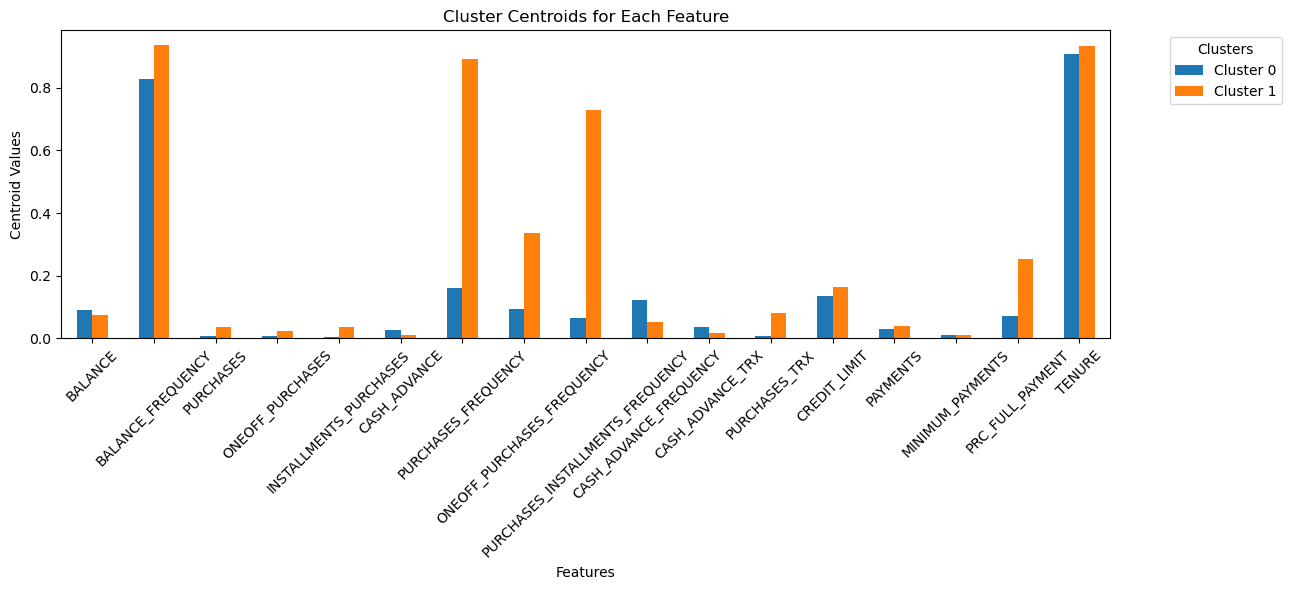

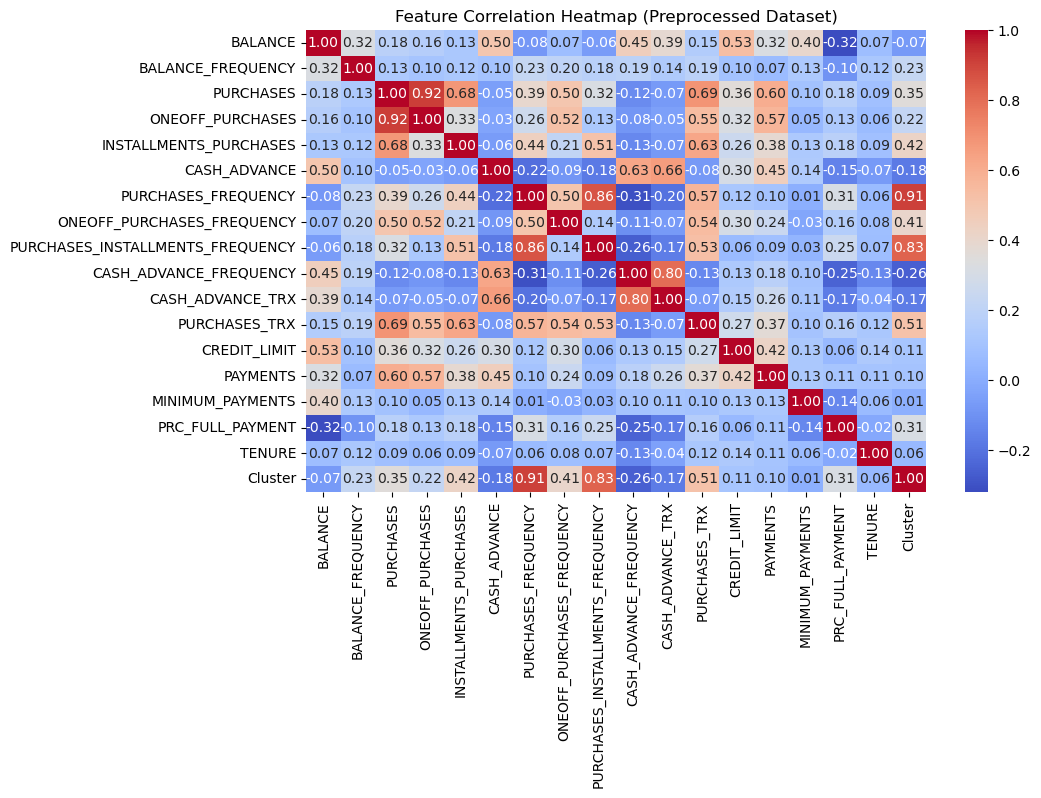


Clustered data has been saved to: /Users/dheeraj/Downloads/Python Assignment/Clustered_CC_General.csv


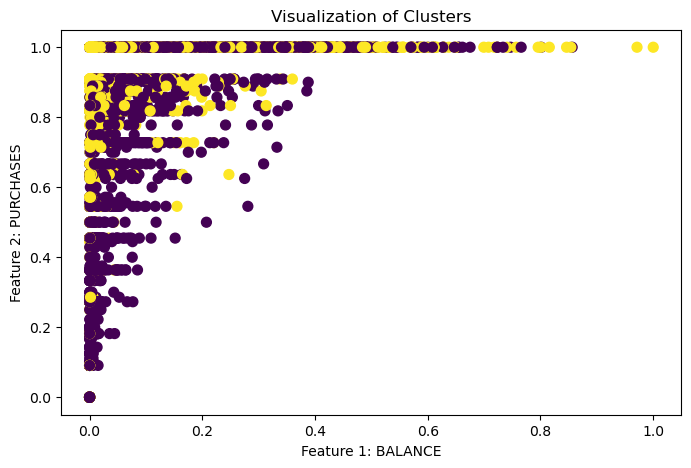

In [33]:
# Fit the K-Means algorithm (exclude 'Cluster' column if it exists)
kmeans.fit(data_scaled_df.iloc[:, :-1])  # Only use numerical features

# Store the cluster labels
data_scaled_df['Cluster'] = kmeans.labels_

# Analyze the Cluster Centroids
# Ensure alignment between the number of features and centroids
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data_scaled_df.columns[:-1])  # Exclude 'Cluster'
cluster_centroids.index = [f"Cluster {i}" for i in range(optimal_clusters)]

# Visualize the cluster centroids
plt.figure(figsize=(10, 6))
cluster_centroids.T.plot(kind='bar', figsize=(13, 6), legend=True)
plt.title("Cluster Centroids for Each Feature")
plt.xlabel("Features")
plt.ylabel("Centroid Values")
plt.xticks(rotation=45)
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# Compute the correlation matrix for the preprocessed dataset
correlation_matrix = data_scaled_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap (Preprocessed Dataset)")
plt.show()

# Step 3: Add Cluster Labels to the Original Data
original_data = pd.read_csv('/Users/dheeraj/Downloads/Python Assignment/CC General.csv')  # Reload the original dataset
data_with_clusters = original_data.copy()
data_with_clusters['Cluster'] = kmeans.labels_

# Save the clustered data
clustered_data = '/Users/dheeraj/Downloads/Python Assignment/Clustered_CC_General.csv'
data_with_clusters.to_csv(clustered_data, index=False)

print(f"\nClustered data has been saved to: {clustered_data}")

# Step 4: Visualize Clusters using scatter graph
plt.figure(figsize=(8, 5))
plt.scatter(data_scaled_df.iloc[:, 0], data_scaled_df.iloc[:, 1], c=data_scaled_df['Cluster'], cmap='viridis', s=50)
plt.title("Visualization of Clusters")
plt.xlabel("Feature 1: BALANCE")
plt.ylabel("Feature 2: PURCHASES")
plt.show()


### Regression Analysis (Line Fitting): BALANCE Vs. MINIMUM_PAYMENTS

Mean Squared Error: 4584801.28
R-Squared: 0.16


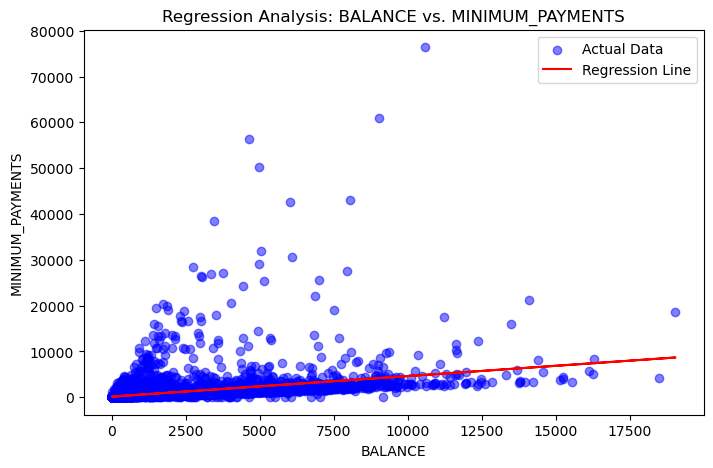

In [87]:

# Reload the clustered data

clustered_data = pd.read_csv('/Users/dheeraj/Downloads/Python Assignment/Clustered_CC_General.csv')

# Select independent (X) and dependent (y) variables for regression
# Predict MINIMUM_PAYMENTS based on BALANCE
X = clustered_data[['BALANCE']].values  # Independent variable
y = clustered_data['MINIMUM_PAYMENTS'].values  # Dependent variable

# Handle any missing values in the dependent variable
y = np.nan_to_num(y)

# Fit the Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Make predictions
y_pred = reg_model.predict(X)

# Calculate performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-Squared: {r2:.2f}')

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.5)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Regression Analysis: BALANCE vs. MINIMUM_PAYMENTS')
plt.xlabel('BALANCE')
plt.ylabel('MINIMUM_PAYMENTS')
plt.legend()
plt.show()
